This project is meant to test whether engineering variables that take into account a horse, jockey and trainer's past race record variables improve models. In this project, features which reflected the past percentage of horses, jockeys and trainers to place in a race were engineered from the raw dataset. Whether the model improved was tested by creating a random forest classifier and testing its performance with the raw data against the data with engineered features. Due to the low performance, this was also done using a gradient boosting classifier. Both models showed relatively low performance (however showed significant improvements on baseline) and no significant differences were observed between the raw data and the data with engineered features. As the low performance of the models could have been acting as a ceiling, this can be further tested when better models for this dataset have been made.

In [648]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [649]:
horses = pd.read_csv('runs.csv')

In [650]:
races = pd.read_csv('races.csv')

In [651]:
horses.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [652]:
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [653]:
combineddf = pd.merge(horses,races, on='race_id')
combineddf

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,...,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN


Data Cleaning

In [654]:
winsdf = horses.groupby('horse_id').count()

In [655]:
winsdf.head()

,race_id,horse_no,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
horse_id,,,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,...,39,39,35,3,0,39,39,36,39,39
1,26,26,26,26,26,26,26,26,26,26,...,26,26,24,1,1,26,26,25,26,26
2,33,33,33,33,33,33,33,33,33,33,...,33,33,29,1,0,33,33,33,33,33
3,3,3,3,3,3,3,3,3,3,3,...,3,3,1,0,0,3,3,3,3,3
4,29,29,29,29,29,29,29,29,29,29,...,29,29,14,3,0,29,29,29,29,29


Deleting attributes that have little effect on whether a horse will place as well as attributes that already contain information about a horses performance in the race.

In [657]:
horses.drop(['lengths_behind','position_sec1','position_sec2','position_sec3','position_sec4','position_sec5',
            'position_sec6','behind_sec1','behind_sec2','behind_sec3','behind_sec4','behind_sec5','behind_sec6',
           'time1','time2','time3','time4','time5','time6'],inplace = True, axis = 1)

In [658]:
horses.drop('horse_gear',inplace=True,axis=1)

Removing all entries with null values

In [659]:
horses.dropna(axis=0,how='any',inplace=True)
horses

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,3,AUS,Gelding,60,1020.0,133,7,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,3,NZ,Gelding,60,980.0,133,12,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,3,NZ,Gelding,60,1082.0,132,8,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,3,SAF,Gelding,60,1118.0,127,13,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3,GB,Gelding,60,972.0,131,14,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76706,6128,10,1153,11,0.0,4,NZ,Gelding,65,1141.0,116,4,82.87,33.0,5.7,118,40
76707,6128,11,1925,6,0.0,6,GB,Gelding,64,1066.0,110,6,82.42,99.0,14.0,73,161
76708,6128,12,2531,4,0.0,3,AUS,Gelding,63,1115.0,109,14,82.25,8.2,2.0,138,10
76709,6128,13,212,9,0.0,4,AUS,Horse,63,1180.0,117,7,82.66,59.0,9.9,7,23


Feature Engineering: Creating the percentage of past races in which a horse, trainer and jockey has placed for each horse racing

In [660]:
horses['place_record_horses'] = 2
horses['place_record_jockeys'] = 2
horses['place_record_trainers'] = 2

In [661]:
horses

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,place_record_horses,place_record_jockeys,place_record_trainers
0,0,1,3917,10,0.0,3,AUS,Gelding,60,1020.0,133,7,83.92,9.7,3.7,118,2,2,2,2
1,0,2,2157,8,0.0,3,NZ,Gelding,60,980.0,133,12,83.56,16.0,4.9,164,57,2,2,2
2,0,3,858,7,0.0,3,NZ,Gelding,60,1082.0,132,8,83.40,3.5,1.5,137,18,2,2,2
3,0,4,1853,9,0.0,3,SAF,Gelding,60,1118.0,127,13,83.62,39.0,11.0,80,59,2,2,2
4,0,5,2796,6,0.0,3,GB,Gelding,60,972.0,131,14,83.24,50.0,14.0,9,154,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76706,6128,10,1153,11,0.0,4,NZ,Gelding,65,1141.0,116,4,82.87,33.0,5.7,118,40,2,2,2
76707,6128,11,1925,6,0.0,6,GB,Gelding,64,1066.0,110,6,82.42,99.0,14.0,73,161,2,2,2
76708,6128,12,2531,4,0.0,3,AUS,Gelding,63,1115.0,109,14,82.25,8.2,2.0,138,10,2,2,2
76709,6128,13,212,9,0.0,4,AUS,Horse,63,1180.0,117,7,82.66,59.0,9.9,7,23,2,2,2


In [662]:
horses['placing'] = -1
for i in range(75710):
    if horses.iloc[i,3] > 3:
        horses.iloc[i,20] = 0
    else:
        horses.iloc[i,20] = 1

In [666]:
horses = horses.sort_values(by=['horse_id','race_id'])
horses.head()

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,...,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,place_record_horses,place_record_jockeys,place_record_trainers,placing
42543,3396,10,0,10,0.0,3,GB,Gelding,65,1142.0,...,2,72.08,34.0,10.0,63,21,2,2,2,0
43723,3489,11,0,9,0.0,3,GB,Gelding,65,1128.0,...,3,70.62,76.0,11.0,63,40,2,2,2,0
47509,3794,1,0,14,0.0,3,GB,Gelding,60,1137.0,...,5,71.29,39.0,8.7,73,21,2,2,2,0
48016,3835,3,0,12,0.0,3,GB,Gelding,58,1157.0,...,10,71.43,99.0,22.0,73,40,2,2,2,0
48647,3886,5,0,4,0.0,3,GB,Gelding,55,1151.0,...,2,96.74,36.0,9.2,73,177,2,2,2,0


In [667]:
for i in range(75710):
    if horses.iloc[i,2] == horses.iloc[i-1,2]:
        sum = sum + horses.iloc[i-1,20]
        no_of_races = no_of_races + 1
        horses.iloc[i,17] = float(sum/no_of_races)
    else:
        horses.iloc[i,17] = np.NaN
        sum = 0
        no_of_races = float(0)

In [669]:
horses.head(20)

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,...,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,place_record_horses,place_record_jockeys,place_record_trainers,placing
42543,3396,10,0,10,0.0,3,GB,Gelding,65,1142.0,...,2,72.08,34.0,10.0,63,21,NaN,2,2,0
43723,3489,11,0,9,0.0,3,GB,Gelding,65,1128.0,...,3,70.62,76.0,11.0,63,40,0.000000,2,2,0
47509,3794,1,0,14,0.0,3,GB,Gelding,60,1137.0,...,5,71.29,39.0,8.7,73,21,0.000000,2,2,0
48016,3835,3,0,12,0.0,3,GB,Gelding,58,1157.0,...,10,71.43,99.0,22.0,73,40,0.000000,2,2,0
48647,3886,5,0,4,0.0,3,GB,Gelding,55,1151.0,...,2,96.74,36.0,9.2,73,177,0.000000,2,2,0
49402,3944,8,0,10,0.0,3,GB,Gelding,55,1162.0,...,7,96.87,14.0,3.0,73,177,0.000000,2,2,0
50195,4008,6,0,8,0.0,3,GB,Gelding,53,1167.0,...,4,101.93,13.0,3.2,73,64,0.000000,2,2,0
50553,4037,7,0,3,0.0,3,GB,Gelding,51,1161.0,...,9,96.68,32.0,7.9,73,64,0.000000,2,2,1
51482,4112,9,0,2,0.0,4,GB,Gelding,51,1167.0,...,13,95.94,17.0,4.4,73,64,0.125000,2,2,1
52294,4177,8,0,14,0.0,4,GB,Gelding,52,1161.0,...,10,111.58,7.9,2.7,73,64,0.222222,2,2,0


In [678]:
horses = horses.sort_values(by=['trainer_id','race_id'])

In [679]:
for i in range(75710):
    if horses.iloc[i,15] == horses.iloc[i-1,15]:
        sum = sum + horses.iloc[i-1,4]
        no_of_races = no_of_races + 1
        horses.iloc[i,19] = float(sum/no_of_races)
    else:
        horses.iloc[i,19] = np.NaN
        sum = horses.iloc[i,4]
        no_of_races = float(0)

In [680]:
horses=horses.sort_values(by=['jockey_id','race_id'])
horses

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,...,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,place_record_horses,place_record_jockeys,place_record_trainers,placing
5300,426,3,1198,6,0.0,3,NZ,Gelding,60,1079.0,...,8,84.42,22.0,4.8,47,0,0.555556,2,0.070175,0
5370,431,8,2648,10,0.0,3,NZ,Brown,60,1076.0,...,11,83.03,70.0,16.0,23,0,NaN,2,NaN,0
5387,432,11,4314,13,0.0,3,NZ,Gelding,60,1011.0,...,5,84.35,99.0,66.0,75,0,0.000000,2,0.057878,0
52798,4217,13,2824,9,0.0,3,AUS,Gelding,60,1168.0,...,9,82.52,99.0,54.0,171,0,NaN,2,NaN,0
21458,1713,2,3081,1,1.0,3,SAF,Gelding,60,1085.0,...,8,68.84,18.0,5.6,74,1,NaN,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72914,5824,13,2891,13,0.0,3,AUS,Gelding,45,1181.0,...,10,58.73,99.0,53.0,75,185,0.000000,2,0.078181,0
72981,5829,12,4089,7,0.0,4,AUS,Gelding,64,1179.0,...,3,82.46,52.0,9.8,117,185,0.357143,2,0.064605,0
72996,5830,13,3214,6,0.0,4,NZ,Gelding,64,1044.0,...,9,70.26,99.0,33.0,75,185,0.173913,2,0.078069,0
73056,5835,10,3688,9,0.0,8,IRE,Gelding,46,1084.0,...,4,111.44,81.0,14.0,4,185,0.259259,2,0.065274,0


In [681]:
for i in range(75710):
    if horses.iloc[i,16] == horses.iloc[i-1,16]:
        sum = sum + horses.iloc[i-1,4]
        no_of_races = no_of_races + 1
        horses.iloc[i,18] = float(sum/no_of_races)
    else:
        horses.iloc[i,18] = np.NaN
        sum = horses.iloc[i,4]
        no_of_races = float(0)

In [682]:
horses.head()

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,...,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,place_record_horses,place_record_jockeys,place_record_trainers,placing
5300,426,3,1198,6,0.0,3,NZ,Gelding,60,1079.0,...,8,84.42,22.0,4.8,47,0,0.555556,NaN,0.070175,0
5370,431,8,2648,10,0.0,3,NZ,Brown,60,1076.0,...,11,83.03,70.0,16.0,23,0,NaN,0.0,NaN,0
5387,432,11,4314,13,0.0,3,NZ,Gelding,60,1011.0,...,5,84.35,99.0,66.0,75,0,0.000000,0.0,0.057878,0
52798,4217,13,2824,9,0.0,3,AUS,Gelding,60,1168.0,...,9,82.52,99.0,54.0,171,0,NaN,0.0,NaN,0
21458,1713,2,3081,1,1.0,3,SAF,Gelding,60,1085.0,...,8,68.84,18.0,5.6,74,1,NaN,NaN,NaN,1


Deleting race attributes that have little effect on whether a horse will place as well as attributes that already contain information about a horses performance in the race.

In [683]:
races.drop('prize',inplace=True,axis=1)

In [684]:
races.drop(['sec_time1','sec_time2','sec_time3','sec_time4','sec_time5','sec_time6','sec_time7','time1','time2','time3',
            'time4','time5','time6','time7','place_combination1','place_combination2','place_combination3',
            'place_combination4','place_dividend1','place_dividend2','place_dividend3','place_dividend4',
            'win_combination1','win_combination2','win_dividend1','win_dividend2','date','race_no','race_class'],inplace=True,axis=1)

In [685]:
races.head()

,race_id,venue,config,surface,distance,going,horse_ratings
0,0,ST,A,0,1400,GOOD TO FIRM,40-15
1,1,ST,A,0,1200,GOOD TO FIRM,40-15
2,2,ST,A,0,1400,GOOD TO FIRM,60-40
3,3,ST,A,0,1200,GOOD TO FIRM,120-95
4,4,ST,A,0,1600,GOOD TO FIRM,60-40


In [686]:
races.head()

,race_id,venue,config,surface,distance,going,horse_ratings
0,0,ST,A,0,1400,GOOD TO FIRM,40-15
1,1,ST,A,0,1200,GOOD TO FIRM,40-15
2,2,ST,A,0,1400,GOOD TO FIRM,60-40
3,3,ST,A,0,1200,GOOD TO FIRM,120-95
4,4,ST,A,0,1600,GOOD TO FIRM,60-40


In [687]:
combineddf = pd.merge(horses,races, on='race_id')
combineddf

,race_id,horse_no,horse_id,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,...,place_record_horses,place_record_jockeys,place_record_trainers,placing,venue,config,surface,distance,going,horse_ratings
0,426,3,1198,6,0.0,3,NZ,Gelding,60,1079.0,...,0.555556,NaN,0.070175,0,ST,C,0,1400,GOOD TO YIELDING,60-40
1,426,6,427,4,0.0,3,AUS,Gelding,60,1084.0,...,1.000000,0.169355,0.055556,0,ST,C,0,1400,GOOD TO YIELDING,60-40
2,426,11,1418,3,0.0,3,AUS,Gelding,60,1058.0,...,0.000000,0.122977,0.057522,1,ST,C,0,1400,GOOD TO YIELDING,60-40
3,426,8,1101,11,0.0,3,AUS,Gelding,60,1059.0,...,0.000000,0.100000,0.083333,0,ST,C,0,1400,GOOD TO YIELDING,60-40
4,426,9,230,2,0.0,3,AUS,Gelding,60,1169.0,...,0.000000,0.144578,0.068493,1,ST,C,0,1400,GOOD TO YIELDING,60-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75705,225,6,3346,8,0.0,3,AUS,Gelding,60,1047.0,...,0.500000,0.000000,0.189542,0,ST,A,0,1400,GOOD,120-95
75706,225,4,3844,6,0.0,3,NZ,Gelding,60,1203.0,...,0.333333,NaN,0.040268,0,ST,A,0,1400,GOOD,120-95
75707,225,5,1402,4,0.0,3,AUS,Gelding,60,1114.0,...,0.600000,0.086420,0.116022,0,ST,A,0,1400,GOOD,120-95
75708,225,9,4265,5,0.0,3,AUS,Gelding,60,1113.0,...,0.000000,0.095652,0.048611,0,ST,A,0,1400,GOOD,120-95


In [688]:
combineddf.drop(['race_id','horse_no','horse_id','trainer_id','jockey_id'],inplace=True,axis=1)

In [695]:
combineddf.head()

,result,won,horse_age,horse_rating,declared_weight,actual_weight,win_odds,place_odds,place_record_horses,place_record_jockeys,...,Rig,Roan,A+3,B,B+2,C,C+3,ST,1,ST
0,6,0.0,3,60,1079.0,131,22.0,4.8,0.555556,NaN,...,0,0,0,0,0,1,0,1,0,1
1,4,0.0,3,60,1084.0,129,1.7,1.0,1.000000,0.169355,...,0,0,0,0,0,1,0,1,0,1
2,3,0.0,3,60,1058.0,124,25.0,5.8,0.000000,0.122977,...,0,0,0,0,0,1,0,1,0,1
3,11,0.0,3,60,1059.0,126,99.0,20.0,0.000000,0.100000,...,0,0,0,0,0,1,0,1,0,1
4,2,0.0,3,60,1169.0,115,22.0,5.0,0.000000,0.144578,...,0,0,0,0,0,1,0,1,0,1


Creating dummy variables for each categorical variable

In [691]:
#number each of the categorical columns
horse_countrydf = pd.get_dummies(combineddf['horse_country'],drop_first=True)
combineddf = pd.concat([combineddf,horse_countrydf],axis=1)
horse_typedf = pd.get_dummies(combineddf['horse_type'],drop_first=True)
combineddf = pd.concat([combineddf,horse_typedf],axis=1)
config_df = pd.get_dummies(combineddf['config'],drop_first=True)
combineddf = pd.concat([combineddf,config_df],axis=1)
venue_df = pd.get_dummies(combineddf['venue'],drop_first=True)
combineddf = pd.concat([combineddf,venue_df],axis=1)
surface_df = pd.get_dummies(combineddf['surface'],drop_first=True)
combineddf = pd.concat([combineddf,surface_df],axis=1)
going_df = pd.get_dummies(combineddf['going'],drop_first=True)
combineddf = pd.concat([combineddf,venue_df],axis=1)
combineddf

,result,won,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,win_odds,place_odds,...,Rig,Roan,A+3,B,B+2,C,C+3,ST,1,ST
0,6,0.0,3,NZ,Gelding,60,1079.0,131,22.0,4.8,...,0,0,0,0,0,1,0,1,0,1
1,4,0.0,3,AUS,Gelding,60,1084.0,129,1.7,1.0,...,0,0,0,0,0,1,0,1,0,1
2,3,0.0,3,AUS,Gelding,60,1058.0,124,25.0,5.8,...,0,0,0,0,0,1,0,1,0,1
3,11,0.0,3,AUS,Gelding,60,1059.0,126,99.0,20.0,...,0,0,0,0,0,1,0,1,0,1
4,2,0.0,3,AUS,Gelding,60,1169.0,115,22.0,5.0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75705,8,0.0,3,AUS,Gelding,60,1047.0,120,8.1,2.4,...,0,0,0,0,0,0,0,1,0,1
75706,6,0.0,3,NZ,Gelding,60,1203.0,122,29.0,6.7,...,0,0,0,0,0,0,0,1,0,1
75707,4,0.0,3,AUS,Gelding,60,1114.0,121,11.0,2.6,...,0,0,0,0,0,0,0,1,0,1
75708,5,0.0,3,AUS,Gelding,60,1113.0,111,7.2,2.9,...,0,0,0,0,0,0,0,1,0,1


Seeing if the engineered attributes have high correlation with horses placing

In [692]:
combineddf.drop(['horse_country','horse_type','config','venue','surface','going'],inplace=True,axis = 1)

<AxesSubplot:>

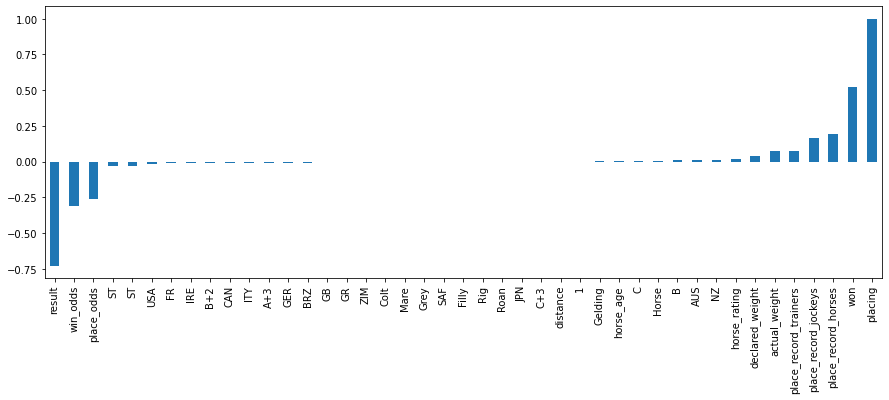

In [694]:
combineddf.corr()['placing'].sort_values().plot(kind='bar', figsize = (15, 5))

In [697]:
combined_no_null = combineddf.dropna(axis=0,how='any',inplace=False)

In [698]:
print(combined_no_null.shape)
print(combineddf.shape)
#percent of data lost
print((combineddf.shape[0]-combined_no_null.shape[0])/combineddf.shape[0]*100)

(71333, 44)
(75710, 44)
5.781270637960639


In [708]:
combined_no_null.drop(['horse_ratings'],inplace=True,axis=1)

c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [709]:
combined_no_null.groupby(by='won').count()

,result,horse_age,horse_rating,actual_weight,win_odds,place_odds,place_record_horses,place_record_jockeys,place_record_trainers,placing,...,Rig,Roan,A+3,B,B+2,C,C+3,ST,1,ST
won,,,,,,,,,,,,,,,,,,,,,
0.0,65542,65542,65542,65542,65542,65542,65542,65542,65542,65542,...,65542,65542,65542,65542,65542,65542,65542,65542,65542,65542
1.0,5791,5791,5791,5791,5791,5791,5791,5791,5791,5791,...,5791,5791,5791,5791,5791,5791,5791,5791,5791,5791


As most horses do not place in a race, the data is already skewed to horses that do not place

In [705]:
combined_no_null.groupby(by='result').count()

,won,horse_age,horse_rating,actual_weight,win_odds,place_odds,place_record_horses,place_record_jockeys,place_record_trainers,placing,...,Rig,Roan,A+3,B,B+2,C,C+3,ST,1,ST
result,,,,,,,,,,,,,,,,,,,,,
1,5791,5791,5791,5791,5791,5791,5791,5791,5791,5791,...,5791,5791,5791,5791,5791,5791,5791,5791,5791,5791
2,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,...,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812
3,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812,...,5812,5812,5812,5812,5812,5812,5812,5812,5812,5812
4,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764,...,5764,5764,5764,5764,5764,5764,5764,5764,5764,5764
5,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733,...,5733,5733,5733,5733,5733,5733,5733,5733,5733,5733
6,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767,...,5767,5767,5767,5767,5767,5767,5767,5767,5767,5767
7,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706,...,5706,5706,5706,5706,5706,5706,5706,5706,5706,5706
8,5660,5660,5660,5660,5660,5660,5660,5660,5660,5660,...,5660,5660,5660,5660,5660,5660,5660,5660,5660,5660
9,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570,...,5570,5570,5570,5570,5570,5570,5570,5570,5570,5570


In [707]:
combined_no_null.groupby(by='placing').count()

,result,won,horse_age,horse_rating,actual_weight,win_odds,place_odds,place_record_horses,place_record_jockeys,place_record_trainers,...,Rig,Roan,A+3,B,B+2,C,C+3,ST,1,ST
placing,,,,,,,,,,,,,,,,,,,,,
0,53918,53918,53918,53918,53918,53918,53918,53918,53918,53918,...,53918,53918,53918,53918,53918,53918,53918,53918,53918,53918
1,17415,17415,17415,17415,17415,17415,17415,17415,17415,17415,...,17415,17415,17415,17415,17415,17415,17415,17415,17415,17415


Data Training

In [812]:
from sklearn.model_selection import train_test_split
X1 = combined_no_null.drop(['placing','won','result','place_record_horses','place_record_trainers',
                          'place_record_jockeys'],inplace=False,axis=1)
y1 = combined_no_null['placing']

X_td1, X_test1, y_td1, y_test1 = train_test_split(X1,y1, test_size=0.25,
                                              random_state=5) # so we get the same results
X_train1, X_dev1, y_train1, y_dev1 = train_test_split(X_td1, y_td1, test_size=0.33,
                                                  random_state=5)

In [813]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

Optimising random forest classifier by testing different parameters

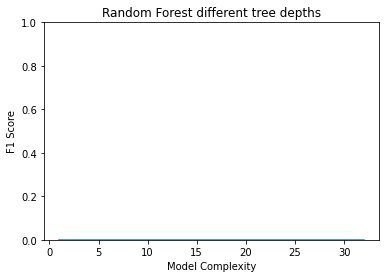

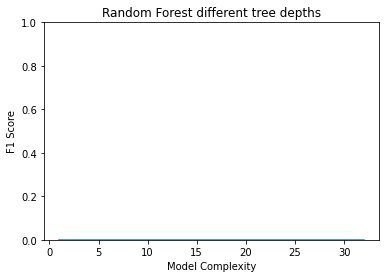

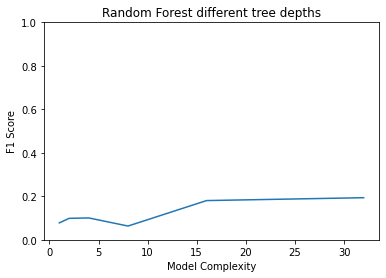

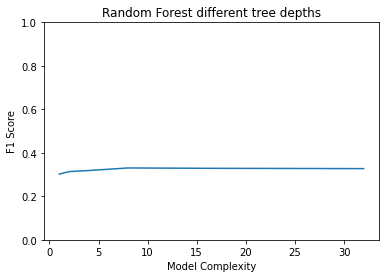

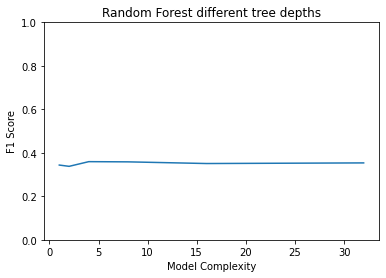

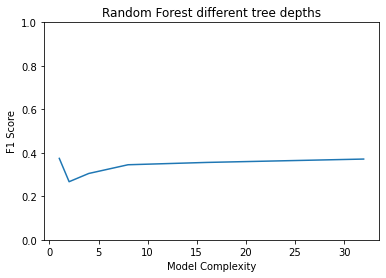

In [814]:
f1scores = []
x_points = [1,2,4,8,16,32]
for maximum_depth in x_points:
    f1scores = []
    for n_estimators in x_points:
        clf = RandomForestClassifier(n_estimators = n_estimators, max_depth=maximum_depth)
        clf.fit(X_train1,y_train1)
        f1scores.append(f1_score(clf.predict(X_dev1),y_dev1))
    plt.plot(x_points,f1scores)
    plt.ylim(0, 1)
    plt.ylabel('F1 Score')
    plt.xlabel('Model Complexity')
    plt.title('Random Forest different tree depths')
    plt.show()

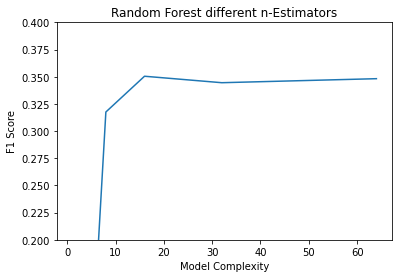

In [815]:
f1scores = []
x_points = [1,2,4,8,16,32,64]
for maximum_depth in x_points:
    clf = RandomForestClassifier(n_estimators=8, max_depth=maximum_depth)
    clf.fit(X_train1,y_train1)
    f1scores.append(f1_score(clf.predict(X_dev1),y_dev1))
plt.plot(x_points,f1scores)
plt.ylim(0.2, 0.4)
plt.ylabel('F1 Score')
plt.xlabel('Model Complexity')
plt.title('Random Forest different n-Estimators')
plt.show()

Training and testing model without the past record features

In [828]:
clf_without_features = RandomForestClassifier(n_estimators = 8,max_depth=16)

In [829]:
clf_without_features.fit(X_train1,y_train1)

RandomForestClassifier(max_depth=16, n_estimators=8)

In [830]:
predictions_without_features = clf_without_features.predict(X_test1)

In [859]:
print(classification_report(y_test1,predictions_without_features))
print('Predicted')
print('')
print(confusion_matrix(y_test1,predictions_without_features))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     13476
           1       0.56      0.25      0.35      4358

    accuracy                           0.77     17834
   macro avg       0.68      0.59      0.60     17834
weighted avg       0.74      0.77      0.73     17834

Predicted
[[12635   841]
 [ 3271  1087]]


Training and testing model with past record features

In [832]:
X2 = combined_no_null.drop(['placing','won','result'],inplace=False,axis=1)
y2 = combined_no_null['placing']

X_td2, X_test2, y_td2, y_test2 = train_test_split(X2,y2, test_size=0.25,
                                              random_state=5)
X_train2, X_dev2, y_train2, y_dev2 = train_test_split(X_td2, y_td2, test_size=0.33,
                                                  random_state=5)

In [833]:
print(math.fsum(y_train))
print(len(y_train))

8640.0
35844


In [834]:
print(math.fsum(y_test))
print(len(y_test))

4358.0
17834


In [835]:
clf_with = RandomForestClassifier(n_estimators = 8, max_depth=16)

In [836]:
clf_with.fit(X_train2,y_train2)

RandomForestClassifier(max_depth=16, n_estimators=8)

In [837]:
predictions_with = clf_without.predict(X_test2)

In [838]:
print(classification_report(y_test2,predictions_with))
print(confusion_matrix(y_test2,predictions_with))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     13476
           1       0.55      0.26      0.35      4358

    accuracy                           0.77     17834
   macro avg       0.67      0.60      0.61     17834
weighted avg       0.74      0.77      0.74     17834

[[12563   913]
 [ 3227  1131]]


Are either of these models good?

In [839]:
#random model based on distribution

import random
random.random()
N = 17834
Success_rate = 17415/71333



In [779]:
from scipy import stats

Random predictions were simulated 10 times and the created models significantly outperformed random models

In [840]:
for i in range(10):
    random_model = [int(random.random()<Success_rate) for _ in range(N)]
    random_correct = np.array([int(p==t) for p,t in zip(random_model, y_test1)])
    classifier_correct = np.array([int(p==t) for p,t in zip(predictions_without_features, y_test1)])
    print(stats.ttest_rel(random_correct,classifier_correct,alternative = 'less'))
    print('Can we reject H0?', 'Yes' if stats.ttest_rel(random_correct,classifier_correct,alternative = 'less')[1]<0.05 else 'No')
    print('')

Ttest_relResult(statistic=-34.8943616818089, pvalue=2.0215360548353473e-258)
Can we reject H0? Yes

Ttest_relResult(statistic=-34.699135248102806, pvalue=1.1766503582139559e-255)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.66423795939033, pvalue=1.8652280049335553e-269)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.61103864962394, pvalue=1.0964095185238385e-268)
Can we reject H0? Yes

Ttest_relResult(statistic=-34.9711145142818, pvalue=1.6403735307160304e-259)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.232864339327165, pvalue=3.0167211659662218e-263)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.43744441200818, pvalue=3.492678406448941e-266)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.32686125809922, pvalue=1.3558483414049201e-264)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.03815870263942, pvalue=1.821663610885686e-260)
Can we reject H0? Yes

Ttest_relResult(statistic=-35.69294392946864, pvalue=7.165430549236275e-270)
Can we reject H0

Model with features vs model w/o features tested against each other showed no significant difference

In [842]:
wfeatures_correct = np.array([int(p==t) for p,t in zip(predictions_with, y_test1)])
withoutfeatures_correct = np.array([int(p==t) for p,t in zip(predictions_without_features, y_test2)])

print(stats.ttest_rel(withoutfeatures_correct,wfeatures_correct,alternative = 'less'))
print('\nCan we reject H0?', 'Yes' if stats.ttest_rel(withoutfeatures_correct,wfeatures_correct
                                                      ,alternative = 'less')[1]/2<0.05 else 'No')



Ttest_relResult(statistic=0.7075482676580278, pvalue=0.7603824626516686)

Can we reject H0? No


Testing against a model that only predicted horse losses (because of skew towards horses not placing) showed significant improvement

In [855]:
baseline = np.zeros(17834)
baseline_correct = np.array([int(p==t) for p,t in zip(baseline, y_test1)])

In [856]:
print(stats.ttest_rel(withoutfeatures_correct,baseline_correct,alternative = 'greater'))
print('\nCan we reject H0?', 'Yes' if stats.ttest_rel(withoutfeatures_correct,baseline_correct
                                                      ,alternative = 'greater')[1]/2<0.05 else 'No')

Ttest_relResult(statistic=5.60727599990516, pvalue=1.0429098744078602e-08)

Can we reject H0? Yes


As models performed poorly the same was tried with gradient boosting classifier

In [845]:
from sklearn.ensemble import GradientBoostingClassifier

In [846]:
gbc_without_features = GradientBoostingClassifier(n_estimators = 200,learning_rate = 1)

In [847]:
gbc_without_features.fit(X_train1,y_train1)

GradientBoostingClassifier(learning_rate=1, n_estimators=200)

In [848]:
predict_gbc_without = gbc_without_features.predict(X_test1)

In [849]:
print(classification_report(y_test1,predict_gbc))
print(confusion_matrix(y_test1,predict_gbc))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     13476
           1       0.55      0.26      0.36      4358

    accuracy                           0.77     17834
   macro avg       0.67      0.60      0.61     17834
weighted avg       0.74      0.77      0.74     17834

[[12534   942]
 [ 3205  1153]]


In [791]:
gbc_with_features = GradientBoostingClassifier(n_estimators = 200,learning_rate = 1)

In [850]:
gbc_with_features.fit(X_train2,y_train2)

GradientBoostingClassifier(learning_rate=1, n_estimators=200)

In [851]:
gbc_predict_with_features = gbc_with_features.predict(X_test2)

In [852]:
print(classification_report(gbc_predict_with_features,y_test2))
print(confusion_matrix(gbc_predict_with_features,y_test2))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     15343
           1       0.28      0.49      0.36      2491

    accuracy                           0.75     17834
   macro avg       0.59      0.64      0.60     17834
weighted avg       0.82      0.75      0.78     17834

[[12210  3133]
 [ 1266  1225]]


Gradient boosting classifier model also significantly outperformed randomised predictions

In [853]:
for i in range(10):
    random_model = [int(random.random()<Success_rate) for _ in range(N)]
    random_correct = np.array([int(p==t) for p,t in zip(random_model, y_test1)])
    classifier_correct = np.array([int(p==t) for p,t in zip(predict_gbc_without, y_test1)])
    print(stats.ttest_rel(random_correct,classifier_correct,alternative = 'less'))
    print('Can we reject H0?', 'Yes' if stats.ttest_rel(random_correct,classifier_correct,alternative = 'less')[1]<0.05 else 'No')
    print('')

Ttest_relResult(statistic=-34.43112485179821, pvalue=6.988767898161164e-252)
Can we reject H0? Yes

Ttest_relResult(statistic=-34.16023750737548, pvalue=4.292131923814376e-248)
Can we reject H0? Yes

Ttest_relResult(statistic=-31.95976215254684, pvalue=2.6761513779220505e-218)
Can we reject H0? Yes

Ttest_relResult(statistic=-33.1769664495798, pvalue=1.454106368708106e-234)
Can we reject H0? Yes

Ttest_relResult(statistic=-34.58015816328402, pvalue=5.6113931728783915e-254)
Can we reject H0? Yes

Ttest_relResult(statistic=-31.49260786279095, pvalue=3.359906259339575e-212)
Can we reject H0? Yes

Ttest_relResult(statistic=-33.54058995152613, pvalue=1.5833346980441416e-239)
Can we reject H0? Yes

Ttest_relResult(statistic=-34.03538870707047, pvalue=2.343284829771836e-246)
Can we reject H0? Yes

Ttest_relResult(statistic=-33.394105215635506, pvalue=1.6019297151956743e-237)
Can we reject H0? Yes

Ttest_relResult(statistic=-33.494047181658374, pvalue=6.8783341930516825e-239)
Can we reject H0?

In [858]:
gbcwfeatures_correct = np.array([int(p==t) for p,t in zip(gbc_predict_with_features, y_test1)])
gbcwithoutfeatures_correct = np.array([int(p==t) for p,t in zip(predict_gbc_without, y_test2)])

print(stats.ttest_rel(gbcwfeatures_correct,gbcwithoutfeatures_correct,alternative = 'less'))
print('\nCan we reject H0?', 'Yes' if stats.ttest_rel(gbcwfeatures_correct,gbcwithoutfeatures_correct
                                                      ,alternative = 'less')[1]/2<0.05 else 'No')

Ttest_relResult(statistic=-3.8591294888511634, pvalue=5.709621804685476e-05)

Can we reject H0? Yes


In [857]:
print(stats.ttest_rel(gbcwithoutfeatures_correct,baseline_correct,alternative = 'greater'))
print('\nCan we reject H0?', 'Yes' if stats.ttest_rel(gbcwithoutfeatures_correct,baseline_correct
                                                      ,alternative = 'greater')[1]/2<0.05 else 'No')

Ttest_relResult(statistic=2.8805796588758454, pvalue=0.00198708788364457)

Can we reject H0? Yes


In [305]:
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     23540
           1       0.00      0.00      0.00         0

    accuracy                           0.75     23540
   macro avg       0.50      0.38      0.43     23540
weighted avg       1.00      0.75      0.86     23540

[[17722  5818]
 [    0     0]]


c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
rfc = RandomForestClassifier()

In [309]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [310]:
predictions = rfc.predict(X_test)

In [311]:
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     21025
           1       0.25      0.58      0.35      2515

    accuracy                           0.77     23540
   macro avg       0.60      0.69      0.61     23540
weighted avg       0.87      0.77      0.81     23540

[[16668  4357]
 [ 1054  1461]]


In [312]:
X = combined_no_null.drop(['place','won','result','win_record_horses','win_record_jockeys','win_record_trainers'],inplace=False,axis=1)
y = combined_no_null['place']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [313]:
rfc2 = RandomForestClassifier()

In [314]:
rfc2.fit(X_train,y_train)

RandomForestClassifier()

In [315]:
predictions = rfc2.predict(X_test)

In [316]:
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

           0       0.93      0.79      0.86     20767
           1       0.27      0.56      0.36      2773

    accuracy                           0.77     23540
   macro avg       0.60      0.68      0.61     23540
weighted avg       0.85      0.77      0.80     23540

[[16500  4267]
 [ 1222  1551]]


Optimisation of RandomForestClassifier

In [356]:
X = combined_no_null.drop(['place','won','result'],inplace=False,axis=1).values
y = combined_no_null['place'].values

In [357]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [370]:
X_td, X_test, y_td, y_test = train_test_split(X,y, test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5)

In [371]:
clf = RandomForestClassifier(max_depth = 8,n_estimators = 8)

In [374]:
clf.fit(X_train,y_train)
X_test

array([[3.000e+00, 6.000e+01, 1.025e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.000e+00, 4.000e+01, 1.049e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 1.065e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.000e+00, 6.000e+01, 1.155e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 1.093e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [3.000e+00, 6.000e+01, 1.159e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [380]:
predictions = clf.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.96      0.79      0.87     16493
           1       0.19      0.62      0.29      1341

    accuracy                           0.77     17834
   macro avg       0.38      0.47      0.39     17834
weighted avg       0.90      0.77      0.82     17834

[[    0     0     0]
 [    1 12968  3524]
 [    0   507   834]]


c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [381]:
clf = RandomForestClassifier()

In [382]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [384]:
predictions = clf.predict(X_test)

In [385]:
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.94      0.80      0.86     15921
           1       0.26      0.58      0.36      1913

    accuracy                           0.77     17834
   macro avg       0.40      0.46      0.41     17834
weighted avg       0.87      0.77      0.81     17834

[[    0     0     0]
 [    1 12676  3244]
 [    0   799  1114]]


c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rishik\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [359]:
NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = math.fsum(train_errors)/len(train_errors)
    test_error = math.fsum(test_errors)/len(test_errors)
    return train_error, test_error

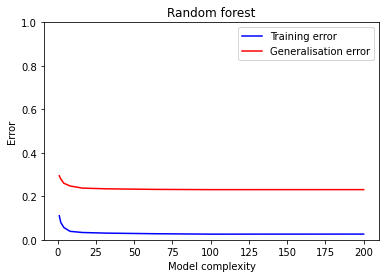

In [361]:
complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64,100,200]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=20)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()

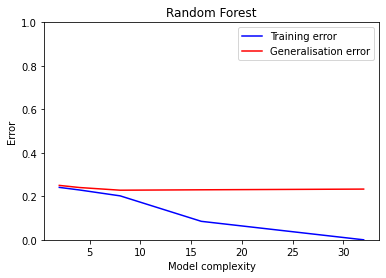

In [362]:
complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = RandomForestClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random Forest')
plt.legend()
plt.show()

In [593]:
combineddf

,result,won,horse_age,horse_rating,declared_weight,actual_weight,win_odds,place_odds,win_record_horses,win_record_jockeys,...,Roan,A+3,B,B+2,C,C+3,ST,1,ST,placing
0,6,0.0,3,60,1079.0,131,22.0,4.8,0.111111,0.070175,...,0,0,0,0,1,0,1,0,1,-1
1,4,0.0,3,60,1084.0,129,1.7,1.0,0.000000,0.055556,...,0,0,0,0,1,0,1,0,1,-1
2,3,0.0,3,60,1058.0,124,25.0,5.8,0.000000,0.057522,...,0,0,0,0,1,0,1,0,1,-1
3,11,0.0,3,60,1059.0,126,99.0,20.0,0.000000,0.083333,...,0,0,0,0,1,0,1,0,1,-1
4,2,0.0,3,60,1169.0,115,22.0,5.0,0.000000,0.068493,...,0,0,0,0,1,0,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75705,8,0.0,3,60,1047.0,120,8.1,2.4,0.250000,0.189542,...,0,0,0,0,0,0,1,0,1,-1
75706,6,0.0,3,60,1203.0,122,29.0,6.7,0.333333,0.040268,...,0,0,0,0,0,0,1,0,1,-1
75707,4,0.0,3,60,1114.0,121,11.0,2.6,0.000000,0.116022,...,0,0,0,0,0,0,1,0,1,-1
75708,5,0.0,3,60,1113.0,111,7.2,2.9,0.000000,0.048611,...,0,0,0,0,0,0,1,0,1,-1


In [606]:
combineddf['placing'] = -1
for i in range(75710):
    if combineddf.iloc[i,0] > 3:
        combineddf.iloc[i,42] = 0
    else:
        combineddf.iloc[i,42] = 1

In [607]:
combineddf

,result,won,horse_age,horse_rating,declared_weight,actual_weight,win_odds,place_odds,win_record_horses,win_record_jockeys,...,Roan,A+3,B,B+2,C,C+3,ST,1,ST,placing
0,6,0.0,3,60,1079.0,131,22.0,4.8,0.111111,0.070175,...,0,0,0,0,1,0,1,0,1,0
1,4,0.0,3,60,1084.0,129,1.7,1.0,0.000000,0.055556,...,0,0,0,0,1,0,1,0,1,0
2,3,0.0,3,60,1058.0,124,25.0,5.8,0.000000,0.057522,...,0,0,0,0,1,0,1,0,1,1
3,11,0.0,3,60,1059.0,126,99.0,20.0,0.000000,0.083333,...,0,0,0,0,1,0,1,0,1,0
4,2,0.0,3,60,1169.0,115,22.0,5.0,0.000000,0.068493,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75705,8,0.0,3,60,1047.0,120,8.1,2.4,0.250000,0.189542,...,0,0,0,0,0,0,1,0,1,0
75706,6,0.0,3,60,1203.0,122,29.0,6.7,0.333333,0.040268,...,0,0,0,0,0,0,1,0,1,0
75707,4,0.0,3,60,1114.0,121,11.0,2.6,0.000000,0.116022,...,0,0,0,0,0,0,1,0,1,0
75708,5,0.0,3,60,1113.0,111,7.2,2.9,0.000000,0.048611,...,0,0,0,0,0,0,1,0,1,0


In [609]:
combineddf = combineddf.sort_values(by=['horse_id','race_id'])

KeyError: 'horse_id'

In [ ]:
for i in range(75710):
    if horses.iloc[i,2] == horses.iloc[i-1,2]:
        sum = sum + horses.iloc[i-1,4]
        no_of_races = no_of_races + 1
        horses.iloc[i,17] = float(sum/no_of_races)
    else:
        horses.iloc[i,17] = np.NaN
        sum = 0
        no_of_races = float(0)